<div style="text-align: right;"><h4>ФБ-33, Дохоян Юлія</h4></div>
<h1><center><b>Лабораторна робота №2</b></center></h1>
<h5><b><center>Хід роботи:</center></b></h5>

Я створила попередньо папку для цієї лр. Де потім створила віртуальне середовище, де ми будемо зберігати необхідні бібліотеки. Активувала його.

Спочатку імпортуємо необхідні бібліотеки.

In [16]:
import os
import urllib.request
import urllib.error
import time
from datetime import datetime
import pandas as pd
import tabulate
print("Налаштування завершено")

Налаштування завершено


 Для кожної із адміністративних одиниць України завантажити тестові
структуровані файли, що містять значення VHI-індексу. Ця процедура має бути
автоматизована, параметром процедури має бути індекс (номер) області. При
зберіганні файлу до його імені потрібно додати дату та час завантаження.

Передбачити повторні запуски скрипту, довантаження нових даних та колізію
даних;

In [ ]:
SAVE_DIR = "D:\\lab"
country = "UKR"
start_year = 1997
end_year = 2025
data_type = "Mean"  

def download_vhi_data(provinceID, start_year, end_year, data_type, SAVE_DIR):
    os.makedirs(SAVE_DIR, exist_ok=True)
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f"VHI_ID_{provinceID}_{timestamp}.csv"
    filepath = os.path.join(SAVE_DIR, filename)
    
    url = (f"https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php"
           f"?country={country}&provinceID={provinceID}&year1={start_year}&year2={end_year}&type={data_type}")
    retries = 2
    for attempt in range(retries):
        try:
            with urllib.request.urlopen(url) as response:
                data = response.read()

          
            if not is_duplicate_file(SAVE_DIR, data):
                with open(filepath, 'wb') as file:
                    file.write(data)
                print(f"[+] Файл {filename} завантажено успішно!")
            else:
                print(f"[!] Дані для ID {provinceID} вже існують. Завантаження пропущено.")
            break
        except urllib.error.URLError as e:
            print(f"[!] Помилка завантаження для ID {provinceID}: {e}")

def is_duplicate_file(SAVE_DIR, new_data):
    
    for existing_file in os.listdir(SAVE_DIR):  
        existing_file_path = os.path.join(SAVE_DIR, existing_file)
        if os.path.isfile(existing_file_path):
            with open(existing_file_path, 'rb') as file:
                if file.read() == new_data:
                    return True
    return False

for provinceID in range(1, 28):
    print(f"[+] Завантаження даних для VHI-ID №{provinceID}...")
    download_vhi_data(provinceID, start_year, end_year, data_type, SAVE_DIR)



[+] Завантаження даних для VHI-ID №1...
[!] Дані для ID 1 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №2...
[!] Дані для ID 2 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №3...
[!] Дані для ID 3 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №4...
[!] Дані для ID 4 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №5...
[!] Дані для ID 5 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №6...
[!] Дані для ID 6 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №7...
[!] Дані для ID 7 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №8...
[!] Дані для ID 8 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №9...
[!] Дані для ID 9 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №10...
[!] Дані для ID 10 вже існують. Завантаження пропущено.
[+] Завантаження даних для VHI-ID №11...
[!] Дан

Зчитати завантажені текстові файли у фрейм

(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) (детальніше

про роботу із фреймами буде розказано у подальших лабораторних роботах).

Імена стовбців фрейму мають бути змістовними та легкими для сприйняття (не

повинно бути спеціалізованих символів, пробілів тощо). Ця задача має бути

реалізована у вигляді окремої процедури, яка на вхід приймає шлях до

директорії, в якій зберігаються файли;

In [8]:
def dataframer(SAVE_DIR):
    fr, columns = [], ["Year", "Week", "SMN", "SMT", "VCI", "TCI", "VHI", "empty"]

    csv_files = filter(lambda x: x.endswith('.csv'), os.listdir(SAVE_DIR))

    for file_name in csv_files:
        file_path = os.path.join(SAVE_DIR, file_name)

        file_parts = file_name.split('_')
        try:
            province_id = int(file_parts[2])  
        except (IndexError, ValueError):
            print(f"Невірний формат імені файлу: {file_name}. Пропускаємо файл.")
            continue

        df = pd.read_csv(file_path, header=1, names=columns)
        df.at[0, "Year"] = df.at[0, "Year"][9:]  
        df = df.drop(df.index[-1])  
        df = df[df["VHI"] != -1]  

        df.insert(0, "province_id", province_id, True)  
        df['Year'] = df['Year'].astype(int)
        df["Week"] = df["Week"].astype(int)

        df = df.drop(columns=["empty"], errors="ignore")  

        fr.append(df)

    df_res = pd.concat(fr).drop_duplicates().reset_index(drop=True)
    
    df_res = df_res.loc[(df_res.province_id != 12) & (df_res.province_id != 20)]

    return df_res

def format_result(df):
    """Форматує результати у текстовий формат."""
    result_string = ""
    for province_id, province_data in df.groupby('province_id'):
        start_year = province_data['Year'].min()
        start_year_data = province_data[province_data['Year'] == start_year].head(1)
        
        end_year = province_data['Year'].max()
        end_year_data = province_data[province_data['Year'] == end_year].tail(1)
        
        result_string += f"\n[= Province ID: {province_id} =]\n"
        result_string += "=" * 55 + "\n"
        result_string += end_year_data.to_string(index=False) + "\n"
    
    return result_string


SAVE_DIR = "D:\\ад"
data_frames_1 = dataframer(SAVE_DIR)
result_string = format_result(data_frames_1)
print(result_string)

data_frames_1.to_csv("result.csv", index=False, encoding="utf-8")
df_loaded = pd.read_csv("result.csv")
#print(df_loaded.head())



Невірний формат імені файлу: result.csv. Пропускаємо файл.

[= Province ID: 1 =]
 province_id  Year  Week   SMN    SMT   VCI   TCI   VHI
           1  2025     9 0.111 274.35 61.72 23.46 42.57

[= Province ID: 2 =]
 province_id  Year  Week   SMN    SMT   VCI   TCI   VHI
           2  2025     9 0.097 268.28 45.15 45.12 45.14

[= Province ID: 3 =]
 province_id  Year  Week   SMN    SMT   VCI   TCI   VHI
           3  2025     9 0.166 277.22 74.88 22.75 48.83

[= Province ID: 4 =]
 province_id  Year  Week   SMN    SMT   VCI  TCI   VHI
           4  2025     9 0.178 280.17 69.18 27.1 48.14

[= Province ID: 5 =]
 province_id  Year  Week   SMN    SMT   VCI   TCI   VHI
           5  2025     9 0.077 271.87 41.19 34.46 37.82

[= Province ID: 6 =]
 province_id  Year  Week   SMN    SMT  VCI  TCI   VHI
           6  2025     9 0.069 271.59 45.2 33.1 39.15

[= Province ID: 7 =]
 province_id  Year  Week   SMN    SMT   VCI   TCI   VHI
           7  2025     9 0.204 276.56 78.49 23.12 50.81

[= Provi

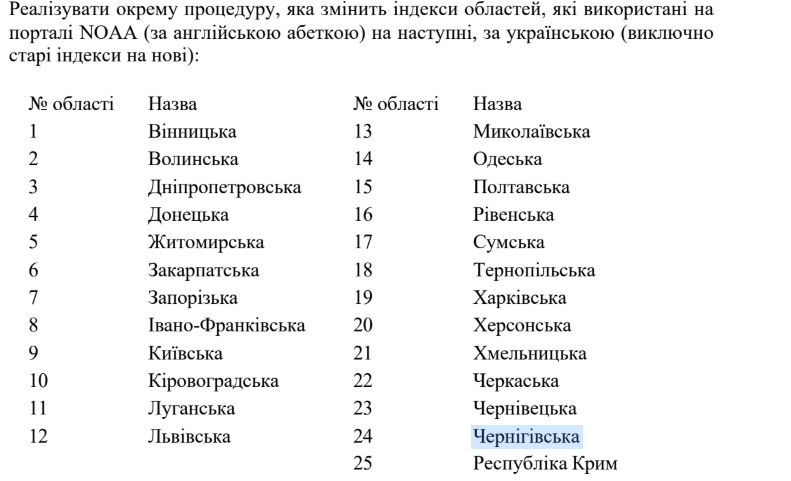

In [ ]:
def replace_function(data_frames):
    province_ID_UKR ={ 
        1: 22,
        2: 24,
        3: 23,
        4: 25,
        5: 3,
        6: 4,
        7: 8,
        8: 19,
        9: 20,
        10: 21,
        11: 9,
        13: 10,
        14: 11,
        15: 12,
        16: 13,
        17: 14,
        18: 15,
        19: 16,
        21: 17,
        22: 18,
        23: 6,
        24: 1,
        25: 2,
        26: 7,
        27: 5,
    }
    
    data_frames_cp = data_frames.copy()
    
    data_frames_cp['province_id'] = data_frames_cp['province_id'].replace(province_ID_UKR)   
      
    return data_frames_cp

data_frames = dataframer(SAVE_DIR)        


data_frames_replace = replace_function(data_frames) 


print(data_frames_replace.head(10))
print(data_frames_replace.tail(10))
print("Унікальні province_id до заміни:", data_frames['province_id'].unique())
print("Унікальні province_id після заміни:", data_frames_replace['province_id'].unique())

print("\nІнформація для province_id = 1:")
print(data_frames_replace[data_frames_replace['province_id'] == 1].to_string(index=False))

print("\nІнформація для province_id = 25:")
print(data_frames_replace[data_frames_replace['province_id'] == 25].to_string(index=False))



Невірний формат імені файлу: result.csv. Пропускаємо файл.
   province_id  Year  Week    SMN     SMT    VCI    TCI    VHI
0           21  1997     1  0.033  260.28  18.96  40.61  29.78
1           21  1997     2  0.034  261.11  22.41  39.23  30.82
2           21  1997     3  0.038  262.00  29.09  37.34  33.22
3           21  1997     4  0.046  263.65  38.77  32.95  35.86
4           21  1997     5  0.060  266.07  48.05  29.16  38.60
5           21  1997     6  0.079  268.86  57.15  25.53  41.34
6           21  1997     7  0.099  271.67  65.84  21.07  43.45
7           21  1997     8  0.117  274.52  71.45  17.78  44.62
8           21  1997     9  0.128  276.35  73.25  18.59  45.92
9           21  1997    10  0.140  278.27  74.30  19.10  46.70
       province_id  Year  Week    SMN     SMT    VCI    TCI    VHI
39005           20  2024    52  0.129  276.48  66.13   3.71  34.92
39006           20  2025     1  0.128  276.35  68.95   2.95  35.95
39007           20  2025     2  0.125  275.96  

Реалізувати процедури для формування вибірок наступного виду

(включаючи елементи аналізу):

o Ряд VHI для області за вказаний рік;

In [ ]:
def get_vhi_province_and_year(df, province_id, year):
  
    province_data = df[(df['province_id'] == province_id) & (df['Year'] == year)]

    if province_data.empty:
        return f"Дані для області {province_id} за рік {year} не знайдені."

    
    return province_data[['Year', 'Week', 'VHI']]


province_id = int(input("Введіть ID області: "))  
year = int(input("Введіть рік: "))  


vhi_data = get_vhi_province_and_year(data_frames_1, province_id, year)


print(vhi_data)


       Year  Week    VHI
23380  2002     1  60.29
23381  2002     2  61.19
23382  2002     3  60.86
23383  2002     4  59.20
23384  2002     5  58.60
23385  2002     6  57.37
23386  2002     7  55.80
23387  2002     8  55.25
23388  2002     9  55.04
23389  2002    10  54.97
23390  2002    11  55.53
23391  2002    12  58.65
23392  2002    13  61.20
23393  2002    14  62.58
23394  2002    15  63.27
23395  2002    16  62.33
23396  2002    17  60.56
23397  2002    18  61.36
23398  2002    19  62.42
23399  2002    20  63.98
23400  2002    21  64.24
23401  2002    22  62.98
23402  2002    23  60.72
23403  2002    24  56.75
23404  2002    25  53.07
23405  2002    26  48.98
23406  2002    27  44.96
23407  2002    28  42.04
23408  2002    29  38.76
23409  2002    30  38.58
23410  2002    31  36.57
23411  2002    32  33.22
23412  2002    33  30.06
23413  2002    34  27.15
23414  2002    35  26.50
23415  2002    36  27.69
23416  2002    37  33.91
23417  2002    38  43.60
23418  2002    39  49.55


Пошук екстремумів (min та max) для вказаних областей та років,

середнього, медіани;

In [ ]:
def statistics(vhi_data):
    
    vhi_values = vhi_data['VHI']
    
    min_vhi = vhi_values.min()
    max_vhi = vhi_values.max()
    mean_vhi = vhi_values.mean()
    median_vhi = vhi_values.median()

    return min_vhi, max_vhi, mean_vhi, median_vhi

province_id = int(input("Введіть ID області: "))  
year = int(input("Введіть рік: "))  
vhi_data = get_vhi_province_and_year(data_frames_1, province_id, year)

if isinstance(vhi_data, pd.DataFrame):
    min_vhi, max_vhi, mean_vhi, median_vhi = statistics(vhi_data)
    print(f"Статистика для області {province_id} за рік {year}:")
    print(f"Мінімум VHI: {min_vhi}")
    print(f"Максимум VHI: {max_vhi}")
    print(f"Середнє VHI: {mean_vhi}")
    print(f"Медіана VHI: {median_vhi}")
else:
    print(vhi_data) 

Статистика для області 5 за рік 2002:
Мінімум VHI: 32.24
Максимум VHI: 73.56
Середнє VHI: 50.95057692307693
Медіана VHI: 49.985


Ряд VHI за вказаний діапазон років для вказаних областей;

In [ ]:
def get_vhi_by_year_and_region(df, start_year, end_year, regions_interest):
    filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    filtered_df = filtered_df[filtered_df['province_id'].isin(regions_interest)]
    vhi_result = filtered_df.groupby(['Year', 'province_id'])['VHI'].mean().reset_index()

    if vhi_result.empty:
        print("Не знайдено даних для вказаного діапазону років та областей.")
    else:
        print("\nРяд VHI за вказаний діапазон років для вказаних областей:\n")
        
    return vhi_result


start_year = int(input("Введіть початковий рік: "))
end_year = int(input("Введіть кінцевий рік: "))
regions_input = input("Введіть області через кому : ")
regions_interest = list(map(int, regions_input.split(',')))


get_vhi_by_year_and_region(dataframer(SAVE_DIR), start_year, end_year, regions_interest)


Невірний формат імені файлу: result.csv. Пропускаємо файл.

Ряд VHI за вказаний діапазон років для вказаних областей:



,Year,province_id,VHI
0,2005,8,57.932549
1,2005,10,53.556667
2,2006,8,48.916154
3,2006,10,51.993846
4,2007,8,48.291538
5,2007,10,49.475962
6,2008,8,47.970577
7,2008,10,54.812308
8,2009,8,43.834038
9,2009,10,44.831154


Для всього набору даних виявити роки, протягом яких екстремальні
посухи торкнулися більше вказаного відсотка областей по Україні (20%
областей - 5 областей з 25). Повернути роки, назви областей з
екстремальними посухами та значення VHI;

In [18]:
def extreme_droughts(df, vhi_max, percentage):
    
    total_provinces = df['province_id'].nunique()
    required_provinces = int(total_provinces * (percentage / 100))

    extreme_droughts_list = []  

    for year, year_data in df.groupby('Year'):        
        extreme_droughts_df = year_data[year_data['VHI'] < vhi_max]      
        if len(extreme_droughts_df) >= required_provinces:
            extreme_droughts_list.append({
                'Year': year,
                'Extreme Droughts': extreme_droughts_df[['province_id', 'VHI']].to_dict(orient='records')
            })   
    if extreme_droughts_list:
        print("Роки з екстремальними посухами, що торкнули більше ніж 20% областей:")
        for result in extreme_droughts_list:
            print(f"Рік: {result['Year']}")
            for drought in result['Extreme Droughts']:
                print(f"Область {drought['province_id']} - VHI: {drought['VHI']}")
    else:
        print("Не знайдено років, де більше 20% областей мали екстремальні посухи.")

    return extreme_droughts_list 


vhi_max = 35  
percentage = 20  
df = dataframer(SAVE_DIR)
extreme_droughts(df, vhi_max, percentage)


Невірний формат імені файлу: result.csv. Пропускаємо файл.
Роки з екстремальними посухами, що торкнули більше ніж 20% областей:
Рік: 1997
Область 10 - VHI: 29.78
Область 10 - VHI: 30.82
Область 10 - VHI: 33.22
Область 11 - VHI: 34.99
Область 13 - VHI: 34.3
Область 13 - VHI: 34.49
Область 14 - VHI: 33.74
Область 14 - VHI: 30.72
Область 14 - VHI: 29.99
Область 14 - VHI: 30.57
Область 14 - VHI: 29.73
Область 14 - VHI: 29.83
Область 14 - VHI: 29.18
Область 14 - VHI: 30.13
Область 14 - VHI: 32.13
Область 14 - VHI: 34.49
Область 16 - VHI: 33.97
Область 16 - VHI: 32.54
Область 16 - VHI: 33.36
Область 18 - VHI: 34.34
Область 18 - VHI: 32.31
Область 18 - VHI: 30.99
Область 18 - VHI: 29.66
Область 18 - VHI: 29.5
Область 18 - VHI: 31.3
Область 18 - VHI: 33.41
Область 18 - VHI: 33.98
Область 1 - VHI: 30.59
Область 1 - VHI: 31.96
Область 1 - VHI: 33.3
Область 1 - VHI: 33.85
Область 1 - VHI: 32.23
Область 1 - VHI: 30.84
Область 1 - VHI: 31.11
Область 1 - VHI: 30.91
Область 1 - VHI: 31.23
Область 1 -

[{'Year': 1997,
  'Extreme Droughts': [{'province_id': 10, 'VHI': 29.78},
   {'province_id': 10, 'VHI': 30.82},
   {'province_id': 10, 'VHI': 33.22},
   {'province_id': 11, 'VHI': 34.99},
   {'province_id': 13, 'VHI': 34.3},
   {'province_id': 13, 'VHI': 34.49},
   {'province_id': 14, 'VHI': 33.74},
   {'province_id': 14, 'VHI': 30.72},
   {'province_id': 14, 'VHI': 29.99},
   {'province_id': 14, 'VHI': 30.57},
   {'province_id': 14, 'VHI': 29.73},
   {'province_id': 14, 'VHI': 29.83},
   {'province_id': 14, 'VHI': 29.18},
   {'province_id': 14, 'VHI': 30.13},
   {'province_id': 14, 'VHI': 32.13},
   {'province_id': 14, 'VHI': 34.49},
   {'province_id': 16, 'VHI': 33.97},
   {'province_id': 16, 'VHI': 32.54},
   {'province_id': 16, 'VHI': 33.36},
   {'province_id': 18, 'VHI': 34.34},
   {'province_id': 18, 'VHI': 32.31},
   {'province_id': 18, 'VHI': 30.99},
   {'province_id': 18, 'VHI': 29.66},
   {'province_id': 18, 'VHI': 29.5},
   {'province_id': 18, 'VHI': 31.3},
   {'province_id'